# Regresión Logística

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import pyreadstat as pr

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
file = 'compensacion-ejecutivos.sav'
df, meta = pr.read_sav(file)
df.columns

Index(['salario', 'noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')

In [3]:
df.salario.describe()

count       110.000000
mean      85256.518182
std       16419.359283
min       47279.000000
25%       74379.000000
50%       86384.000000
75%       96827.250000
max      118683.000000
Name: salario, dtype: float64

In [4]:
# Vamos a convertir la variable Y en una variable binaria. Para ello se utiliza numpy.
# Queremos averiguar si el salario es > 96000, y si lo es, que tome el valor de 1, de lo contrario, que tome el valor de 0
y = np.where(df['salario'] > 96000, 1, 0)
X = df.drop(['salario'], axis = 1)
y

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

Text(0, 0.5, 'y')

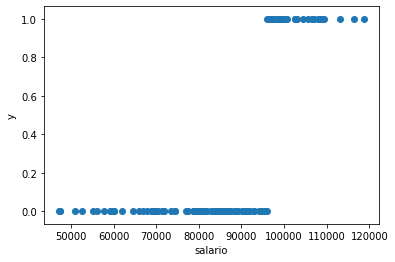

In [5]:
fig, ax = plt.subplots()
ax.scatter(df.salario, y)
ax.set_xlabel('salario')
ax.set_ylabel('y')

In [6]:
reg_log = linear_model.LogisticRegression()
reg_log.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
y_estimado = reg_log.predict_proba(X)
y_estimado

array([[4.39538178e-01, 5.60461822e-01],
       [9.78148894e-01, 2.18511060e-02],
       [6.59286204e-01, 3.40713796e-01],
       [9.82159113e-01, 1.78408868e-02],
       [6.70848737e-01, 3.29151263e-01],
       [2.03018004e-01, 7.96981996e-01],
       [9.22478258e-01, 7.75217424e-02],
       [4.20159794e-01, 5.79840206e-01],
       [8.03662576e-01, 1.96337424e-01],
       [9.77631167e-01, 2.23688334e-02],
       [9.06109495e-01, 9.38905048e-02],
       [8.47522747e-01, 1.52477253e-01],
       [9.95393767e-01, 4.60623344e-03],
       [3.19263966e-01, 6.80736034e-01],
       [7.63327838e-01, 2.36672162e-01],
       [7.67016117e-01, 2.32983883e-01],
       [9.73512282e-01, 2.64877181e-02],
       [5.91913095e-01, 4.08086905e-01],
       [3.77281945e-01, 6.22718055e-01],
       [9.99180746e-01, 8.19254265e-04],
       [3.20250422e-01, 6.79749578e-01],
       [8.22737645e-01, 1.77262355e-01],
       [5.15421891e-01, 4.84578109e-01],
       [9.88088141e-01, 1.19118594e-02],
       [9.950489

In [8]:
# Si queremos saber la probabilidad de ganar un salario superior a 96000
y_estimado_1 = reg_log.predict_proba(X)[:,1]
y_estimado_1

array([5.60461822e-01, 2.18511060e-02, 3.40713796e-01, 1.78408868e-02,
       3.29151263e-01, 7.96981996e-01, 7.75217424e-02, 5.79840206e-01,
       1.96337424e-01, 2.23688334e-02, 9.38905048e-02, 1.52477253e-01,
       4.60623344e-03, 6.80736034e-01, 2.36672162e-01, 2.32983883e-01,
       2.64877181e-02, 4.08086905e-01, 6.22718055e-01, 8.19254265e-04,
       6.79749578e-01, 1.77262355e-01, 4.84578109e-01, 1.19118594e-02,
       4.95105410e-03, 2.22525593e-02, 5.72691371e-01, 1.06357265e-01,
       1.48324507e-02, 3.76063257e-01, 4.46845890e-01, 5.03537624e-01,
       4.76812772e-03, 5.53016419e-01, 1.57016516e-01, 5.90365186e-01,
       7.48524569e-02, 6.18930473e-01, 2.79821150e-01, 4.16278991e-01,
       3.02424904e-01, 1.51683200e-02, 5.59124020e-01, 2.46196442e-01,
       1.44120593e-02, 6.68076012e-01, 7.87662744e-01, 1.26051430e-01,
       8.57368843e-02, 6.64205865e-01, 9.58222158e-01, 9.66547648e-01,
       2.21804096e-02, 4.09341892e-02, 6.53760730e-01, 3.55711998e-01,
      

In [9]:
# Si no deseamos una probabilidad, sino el valo puntual, pedimos a reg_log y él automaticamente definirá cuál es el corte de probabilidad dentro de la que hemos calculado, que define si digamos, un 0.48 debe ser mapeado o transformado a un 1 o a un 0.
y_estimado_prob = reg_log.predict(X)
y_estimado_prob
# Y esto se puede comparar con el Y que hemos hallado antes.

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [10]:
y == y_estimado_prob

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

De acuerdo a la predicción, podemos realizar algunas medidas de desempeño como por ejemplo la función de accuracy.
`from sklearn.metrics import accuracy_score(y, reg_log.predict(X))`

In [11]:
y_estimado_1, X

(array([5.60461822e-01, 2.18511060e-02, 3.40713796e-01, 1.78408868e-02,
        3.29151263e-01, 7.96981996e-01, 7.75217424e-02, 5.79840206e-01,
        1.96337424e-01, 2.23688334e-02, 9.38905048e-02, 1.52477253e-01,
        4.60623344e-03, 6.80736034e-01, 2.36672162e-01, 2.32983883e-01,
        2.64877181e-02, 4.08086905e-01, 6.22718055e-01, 8.19254265e-04,
        6.79749578e-01, 1.77262355e-01, 4.84578109e-01, 1.19118594e-02,
        4.95105410e-03, 2.22525593e-02, 5.72691371e-01, 1.06357265e-01,
        1.48324507e-02, 3.76063257e-01, 4.46845890e-01, 5.03537624e-01,
        4.76812772e-03, 5.53016419e-01, 1.57016516e-01, 5.90365186e-01,
        7.48524569e-02, 6.18930473e-01, 2.79821150e-01, 4.16278991e-01,
        3.02424904e-01, 1.51683200e-02, 5.59124020e-01, 2.46196442e-01,
        1.44120593e-02, 6.68076012e-01, 7.87662744e-01, 1.26051430e-01,
        8.57368843e-02, 6.64205865e-01, 9.58222158e-01, 9.66547648e-01,
        2.21804096e-02, 4.09341892e-02, 6.53760730e-01, 3.557119

In [12]:
metrics.accuracy_score(y, reg_log.predict(X))

0.9090909090909091

# Nuestro modelo puede aproximar en un 90.9% de los casos utilizando las variables que definimos anteriormente dentro de X